<a href="https://colab.research.google.com/github/enikeevaRAMZ/Innopolis_PISH/blob/main/%D0%90%D1%82%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D1%8F_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import anderson
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon

In [ ]:
df=pd.read_excel("Nasdaq.xlsx")

In [ ]:
df

,Unnamed: 0,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry,Z
0,871,BAM,Brookfield Asset Management Inc. Common Stock,$45.52,-1.670,-3.539%,74720277027,Canada,1925,1563431,Consumer Discretionary,Other Consumer Services,BAM
1,2048,CVR,Chicago Rivet & Machine Co. Common Stock,$28.47,-0.020,-0.07%,27505778,United States,1930,882,Consumer Discretionary,Industrial Specialties,CVR
2,4491,LGL,LGL Group Inc. (The) Common Stock,$11.435,-0.065,-0.565%,61296974,United States,1946,1509,Technology,Industrial Machinery/Components,LGL
3,1526,CET,Central Securities Corporation Common Stock,$35.75,-0.520,-1.434%,974773228,United States,1951,15250,Finance,Finance/Investors Services,CET
4,5166,NBR,Nabors Industries Ltd.,$161.03,-12.920,-7.427%,1515601156,Bermuda,1951,82194,Energy,Oil & Gas Production,NBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,8254,XPDB,Power & Digital Infrastructure Acquisition II ...,$9.81,0.010,0.102%,352546875,United States,2022,243,Industrials,Consumer Electronics/Appliances,XPDB
3901,8256,XPDBW,Power & Digital Infrastructure Acquisition II ...,$0.24,-0.015,-5.882%,0,United States,2022,8100,Industrials,Consumer Electronics/Appliances,XPDBW
3902,8264,XPON,Expion360 Inc. Common Stock,$2.97,-0.230,-7.188%,20167963,United States,2022,70206,Technology,Electronic Components,XPON
3903,8322,ZING,FTAC Zeus Acquisition Corp. Class A Common Stock,$9.88,0.000,0.00%,553658730,United States,2022,506,Industrials,Consumer Electronics/Appliances,ZING


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3905 entries, 0 to 3904
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3905 non-null   int64  
 1   Symbol      3905 non-null   object 
 2   Name        3905 non-null   object 
 3   Last Sale   3905 non-null   object 
 4   Net Change  3905 non-null   float64
 5   % Change    3905 non-null   object 
 6   Market Cap  3905 non-null   int64  
 7   Country     3905 non-null   object 
 8   IPO Year    3905 non-null   int64  
 9   Volume      3905 non-null   int64  
 10  Sector      3905 non-null   object 
 11  Industry    3905 non-null   object 
 12  Z           3905 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 396.7+ KB


In [ ]:
df.describe()

,Unnamed: 0,Net Change,Market Cap,IPO Year,Volume
count,3905.000000,3905.000000,3.905000e+03,3905.000000,3.905000e+03
mean,4170.461460,-0.991582,5.754744e+09,2013.071703,5.780370e+05
std,2377.129162,4.169152,6.353889e+10,10.522540,2.639760e+06
min,0.000000,-170.985000,0.000000e+00,1925.000000,1.000000e+00
25%,2191.000000,-0.730000,3.427910e+07,2007.000000,9.897000e+03
50%,4181.000000,-0.170000,2.704117e+08,2018.000000,7.495700e+04
75%,6236.000000,-0.010000,1.165274e+09,2021.000000,3.249490e+05
max,8356.000000,7.380000,2.330135e+12,2022.000000,6.188427e+07


Все строки ДатаФрейма заполнены, выбросов нет.

## **2. Выбор компаниий случайным образом из списка Nasdaq**

In [ ]:
# np.random.seed(0)
np.random.randint(1, len(df))

# 2608

279

In [ ]:
df.loc[2608]

Unnamed: 0                                          6463
Symbol                                               RKT
Name          Rocket Companies Inc. Class A Common Stock
Last Sale                                          $7.45
Net Change                                         -0.45
% Change                                         -5.696%
Market Cap                                     883119722
Country                                    United States
IPO Year                                            2020
Volume                                           1635350
Sector                                           Finance
Industry                      Finance: Consumer Services
Z                                                    RKT
Name: 2608, dtype: object

1.   год IPO: 2020
2.   страну: United States
3.   сектор: Finance
4.   индустрию: Consumer Services

## **3. Оценить степени связи между двумя категориальными переменными: страной и индурстрией**

In [ ]:
df['Industry'].value_counts()

Consumer Electronics/Appliances               658
Biotechnology: Pharmaceutical Preparations    450
Business Services                             279
EDP Services                                  152
Computer Software: Prepackaged Software       130
                                             ... 
EDP Peripherals                                 1
Construction Materials                          1
Forest Products                                 1
Computer Communications Equipment               1
Retail-Auto Dealers and Gas Stations            1
Name: Industry, Length: 144, dtype: int64

In [ ]:
df['Country'].value_counts()

United States           3379
China                    159
Israel                    50
United Kingdom            41
Hong Kong                 29
Cayman Islands            23
Bermuda                   20
Netherlands               18
Singapore                 18
Brazil                    15
Canada                    12
Mexico                    12
Germany                   12
Switzerland               11
France                    11
Greece                    10
Ireland                   10
Denmark                    7
Taiwan                     6
Argentina                  6
Luxembourg                 5
South Korea                5
India                      4
Australia                  4
Monaco                     4
Malaysia                   3
Malta                      3
Belgium                    3
Sweden                     3
Panama                     2
Jordan                     2
Curacao                    2
Jersey                     2
Japan                      2
Norway        

Н0: между страной и индустрией нет
статистически значимой разницы

In [ ]:
contingency_table = pd.crosstab(df['Country'], df['Industry'])

In [ ]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=14138.045163038063, pvalue=0.0, dof=6435, expected_freq=array([[4.60947503e-03, 4.60947503e-02, 2.30473752e-02, ...,
        6.14596671e-03, 7.68245839e-03, 9.21895006e-03],
       [3.07298335e-03, 3.07298335e-02, 1.53649168e-02, ...,
        4.09731114e-03, 5.12163892e-03, 6.14596671e-03],
       [2.30473752e-03, 2.30473752e-02, 1.15236876e-02, ...,
        3.07298335e-03, 3.84122919e-03, 4.60947503e-03],
       ...,
       [7.68245839e-04, 7.68245839e-03, 3.84122919e-03, ...,
        1.02432778e-03, 1.28040973e-03, 1.53649168e-03],
       [3.14980794e-02, 3.14980794e-01, 1.57490397e-01, ...,
        4.19974392e-02, 5.24967990e-02, 6.29961588e-02],
       [2.59590269e+00, 2.59590269e+01, 1.29795134e+01, ...,
        3.46120359e+00, 4.32650448e+00, 5.19180538e+00]]))

*Если p (0.0) <0.05, можно сделать вывод о наличии связи.*

Вывод: статистически значимая связь между страной и индустрией существует.

## **4. Рассмотреть как распределены доли рыночной стоимости компаний из этого сектора. Сравнить с рапределениями всех остальных секторов.**

In [ ]:
df['Sector'].value_counts()

Finance                   878
Industrials               858
Health Care               746
Consumer Discretionary    553
Technology                484
Real Estate               138
Energy                     85
Utilities                  64
Consumer Staples           39
Telecommunications         25
Miscellaneous              24
Basic Materials            11
Name: Sector, dtype: int64

In [ ]:
Sector_Finance=df.loc[df['Sector'] == 'Finance']
Sector_Industrials=df.loc[df['Sector'] == 'Industrials']
Sector_Health_Care=df.loc[df['Sector'] == 'Health Care']
Sector_Consumer_Discretionary=df.loc[df['Sector'] == 'Consumer Discretionary']
Sector_Technology=df.loc[df['Sector'] == 'Technology']
Sector_Real_Estate=df.loc[df['Sector'] == 'Real Estate']
Sector_Energy=df.loc[df['Sector'] == 'Energy']
Sector_Utilities=df.loc[df['Sector'] == 'Utilities']
Sector_Consumer_Staples=df.loc[df['Sector'] == 'Consumer Staples']
Sector_Telecommunications=df.loc[df['Sector'] == 'Telecommunications']
Sector_Miscellaneous=df.loc[df['Sector'] == 'Miscellaneous']
Sector_Basic_Materials=df.loc[df['Sector'] == 'Basic Materials']

<Axes: xlabel='Market Cap', ylabel='Density'>

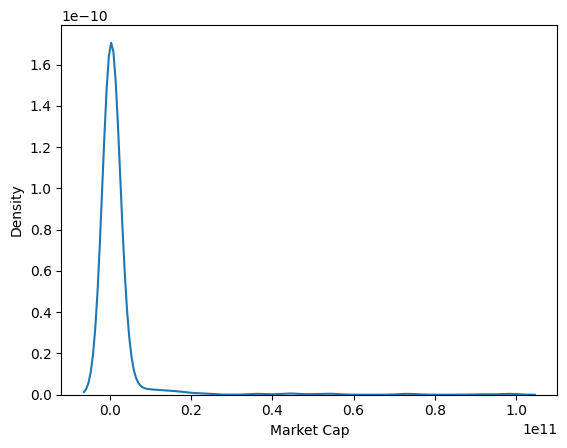

In [ ]:
sns.kdeplot(Sector_Finance['Market Cap'])

In [ ]:
shapiro(Sector_Finance['Market Cap'])

ShapiroResult(statistic=0.20454883575439453, pvalue=0.0)

In [ ]:
kstest(Sector_Finance['Market Cap'], 'norm')

KstestResult(statistic=0.8029612756264237, pvalue=0.0, statistic_location=7505229, statistic_sign=-1)

In [ ]:
anderson(Sector_Finance['Market Cap'], 'norm')

AndersonResult(statistic=251.640222897905, critical_values=array([0.573, 0.653, 0.783, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1839563729.5375855, scale=8192104747.170702)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Sector_Finance['Market Cap'] - нельзя утверждать, что нормальное распределение

<Axes: xlabel='Market Cap', ylabel='Density'>

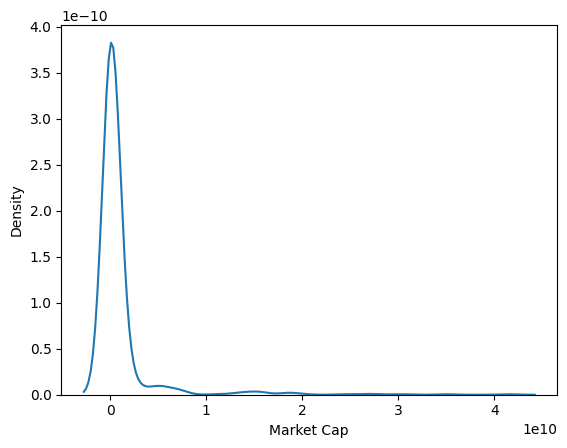

In [ ]:
sns.kdeplot(Sector_Industrials['Market Cap'])

In [ ]:
shapiro(Sector_Industrials['Market Cap'])

ShapiroResult(statistic=0.27802759408950806, pvalue=0.0)

In [ ]:
kstest(Sector_Industrials['Market Cap'], 'norm')

KstestResult(statistic=0.5314685314685315, pvalue=9.541278838860554e-227, statistic_location=4286154, statistic_sign=-1)

In [ ]:
anderson(Sector_Industrials['Market Cap'], 'norm')

AndersonResult(statistic=229.75078981537035, critical_values=array([0.573, 0.653, 0.783, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=947039856.2703962, scale=3528178800.903077)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

Sector_Industrials['Market Cap'] - нельзя утверждать, что нормальное распределение

<Axes: xlabel='Market Cap', ylabel='Density'>

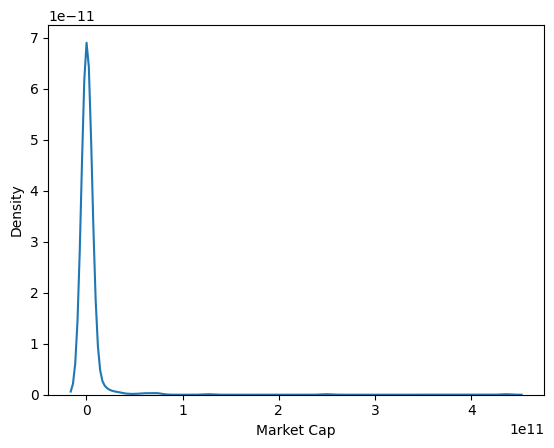

In [ ]:
sns.kdeplot(Sector_Health_Care['Market Cap'])

In [ ]:
shapiro(Sector_Health_Care['Market Cap'])

ShapiroResult(statistic=0.11412036418914795, pvalue=0.0)

In [ ]:
kstest(Sector_Health_Care['Market Cap'], 'norm')

KstestResult(statistic=0.9557640750670241, pvalue=0.0, statistic_location=3138621, statistic_sign=-1)

Sector_Health_Care['Market Cap'] - нельзя утверждать, что нормальное распределение



<Axes: xlabel='Market Cap', ylabel='Density'>

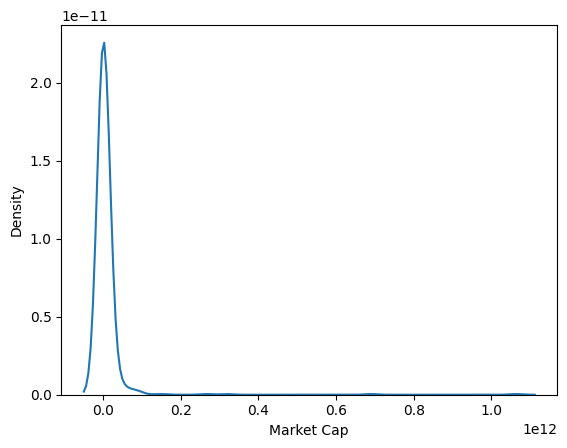

In [ ]:
sns.kdeplot(Sector_Consumer_Discretionary['Market Cap'])

In [ ]:
shapiro(Sector_Consumer_Discretionary['Market Cap'])

ShapiroResult(statistic=0.11577308177947998, pvalue=1.1210387714598537e-44)

In [ ]:
kstest(Sector_Consumer_Discretionary['Market Cap'], 'norm')

KstestResult(statistic=0.9439421338155516, pvalue=0.0, statistic_location=2945629, statistic_sign=-1)

Sector_Consumer_Discretionary['Market Cap'] - нельзя утверждать, что нормальное распределение


<Axes: xlabel='Market Cap', ylabel='Density'>

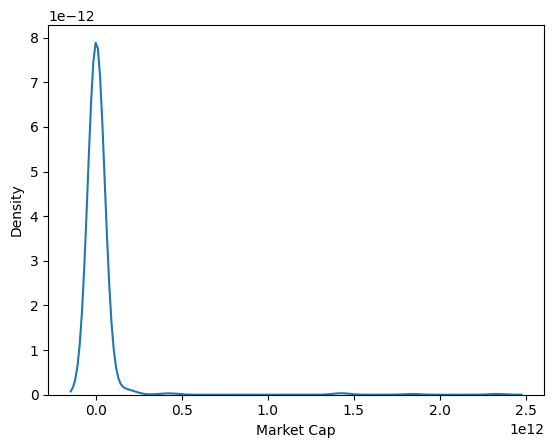

In [ ]:
sns.kdeplot(Sector_Technology['Market Cap'])

In [ ]:
shapiro(Sector_Technology['Market Cap'])

ShapiroResult(statistic=0.1143420934677124, pvalue=1.8959568222314775e-42)

In [ ]:
kstest(Sector_Technology['Market Cap'], 'norm')

KstestResult(statistic=0.9400826446280992, pvalue=0.0, statistic_location=4725351, statistic_sign=-1)

Sector_Technology['Market Cap'] - нельзя утверждать, что нормальное распределение

<Axes: xlabel='Market Cap', ylabel='Density'>

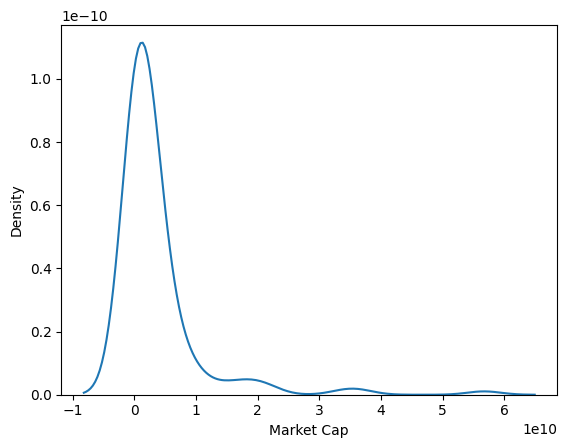

In [ ]:
sns.kdeplot(Sector_Real_Estate['Market Cap'])

In [ ]:
shapiro(Sector_Real_Estate['Market Cap'])

ShapiroResult(statistic=0.48918503522872925, pvalue=6.564034236012585e-20)

In [ ]:
kstest(Sector_Real_Estate['Market Cap'], 'norm')

KstestResult(statistic=0.9420289855072463, pvalue=4.2086744516955895e-171, statistic_location=9944945, statistic_sign=-1)

Sector_Real_Estate['Market Cap'] - нельзя утверждать, что нормальное распределение

<Axes: xlabel='Market Cap', ylabel='Density'>

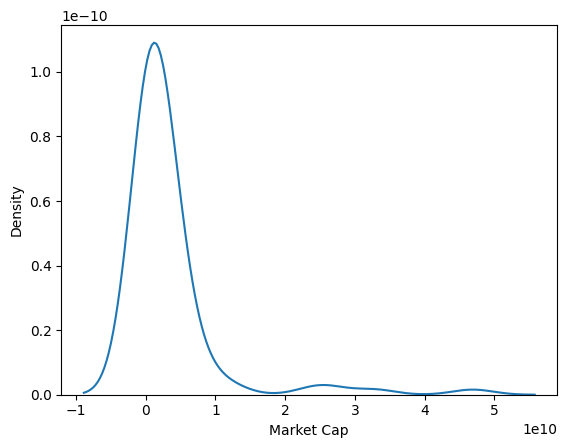

In [ ]:
sns.kdeplot(Sector_Energy['Market Cap'])

In [ ]:
shapiro(Sector_Energy['Market Cap'])

ShapiroResult(statistic=0.45395153760910034, pvalue=3.3253491775711206e-16)

In [ ]:
kstest(Sector_Energy['Market Cap'], 'norm')

KstestResult(statistic=0.9529411764705882, pvalue=2.988963397464307e-113, statistic_location=5331536, statistic_sign=-1)

Sector_Energy['Market Cap'] - нельзя утверждать, что нормальное распределение

<Axes: xlabel='Market Cap', ylabel='Density'>

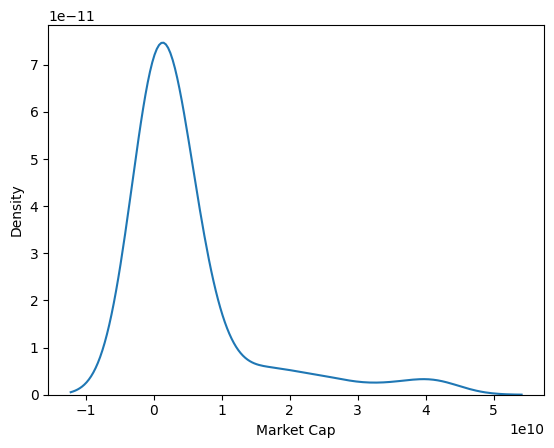

In [ ]:
sns.kdeplot(Sector_Utilities['Market Cap'])

In [ ]:
shapiro(Sector_Utilities['Market Cap'])

ShapiroResult(statistic=0.5825439691543579, pvalue=3.287119274691941e-12)

In [ ]:
kstest(Sector_Utilities['Market Cap'], 'norm')

KstestResult(statistic=0.734375, pvalue=7.611224548478098e-36, statistic_location=11347344, statistic_sign=-1)

Sector_Utilities['Market Cap'] - нельзя утверждать, что нормальное распределение

<Axes: xlabel='Market Cap', ylabel='Density'>

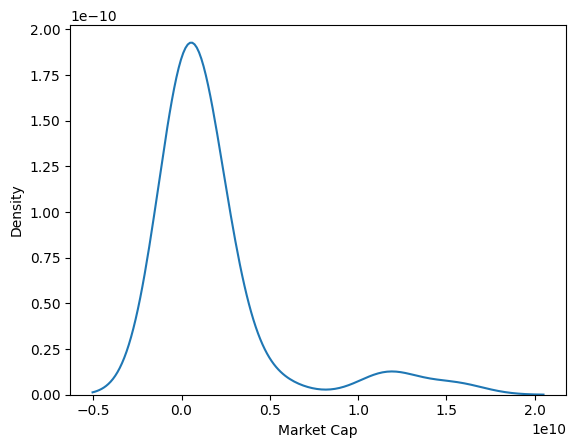

In [ ]:
sns.kdeplot(Sector_Consumer_Staples['Market Cap'])

In [ ]:
shapiro(Sector_Consumer_Staples['Market Cap'])


ShapiroResult(statistic=0.5262998342514038, pvalue=4.818725418687109e-10)

In [ ]:
kstest(Sector_Consumer_Staples['Market Cap'], 'norm')

KstestResult(statistic=0.9230769230769231, pvalue=7.199139879392241e-44, statistic_location=3964687, statistic_sign=-1)

Sector_Consumer_Staples['Market Cap'] - нельзя утверждать, что нормальное распределение

<Axes: xlabel='Market Cap', ylabel='Density'>

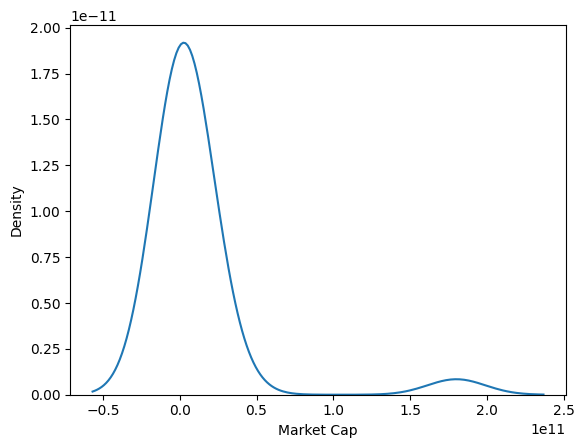

In [ ]:
sns.kdeplot(Sector_Telecommunications['Market Cap'])

In [ ]:
shapiro(Sector_Telecommunications['Market Cap'])

ShapiroResult(statistic=0.31849294900894165, pvalue=9.142672174888844e-10)

In [ ]:
kstest(Sector_Telecommunications['Market Cap'], 'norm')

KstestResult(statistic=0.88, pvalue=1.9287031020910955e-23, statistic_location=10581892, statistic_sign=-1)

Sector_Telecommunications['Market Cap'] - нельзя утверждать, что нормальное распределение

<Axes: xlabel='Market Cap', ylabel='Density'>

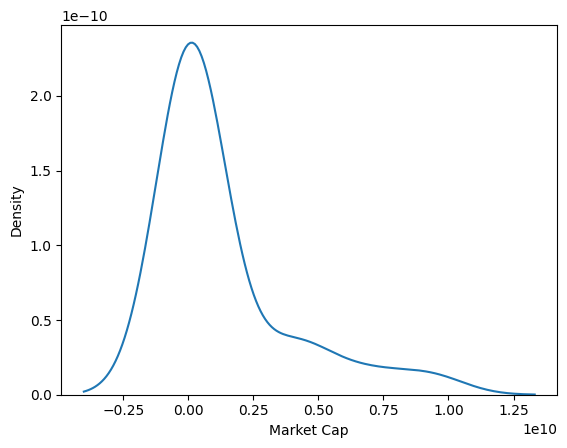

In [ ]:
sns.kdeplot(Sector_Miscellaneous['Market Cap'])

In [ ]:
shapiro(Sector_Miscellaneous['Market Cap'])

ShapiroResult(statistic=0.5750850439071655, pvalue=3.295080546195095e-07)

In [ ]:
kstest(Sector_Miscellaneous['Market Cap'], 'norm')

KstestResult(statistic=0.8333333333333334, pvalue=4.906115377843993e-19, statistic_location=4025311, statistic_sign=-1)

Sector_Miscellaneouss['Market Cap'] - нельзя утверждать, что нормальное распределение

<Axes: xlabel='Market Cap', ylabel='Density'>

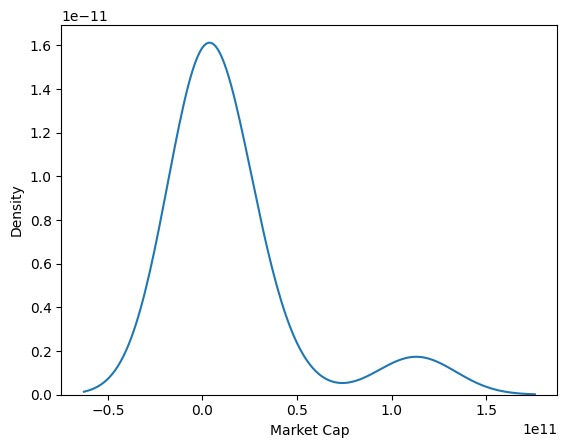

In [ ]:
sns.kdeplot(Sector_Basic_Materials['Market Cap'])

In [ ]:
shapiro(Sector_Basic_Materials['Market Cap'])

ShapiroResult(statistic=0.5175981521606445, pvalue=2.474800794516341e-06)

In [ ]:
kstest(Sector_Basic_Materials['Market Cap'], 'norm')

KstestResult(statistic=0.9090909090909091, pvalue=7.009877989627876e-12, statistic_location=24101566, statistic_sign=-1)

Sector_Basic_Materials['Market Cap'] - нельзя утверждать, что нормальное распределение

In [ ]:
# существуют статистические различия между сектором Finance и Industrials
scipy.stats.mannwhitneyu(Sector_Finance['Market Cap'], Sector_Industrials['Market Cap'], use_continuity=True)

MannwhitneyuResult(statistic=485146.5, pvalue=3.578697128410663e-26)

In [ ]:
# не существуют статистические различия между сектором Finance и Health Care
scipy.stats.mannwhitneyu(Sector_Finance['Market Cap'], Sector_Health_Care['Market Cap'], use_continuity=True)

MannwhitneyuResult(statistic=332624.5, pvalue=0.5855707073152338)

In [ ]:
# существуют статистические различия между сектором Finance и Health Care
scipy.stats.mannwhitneyu(Sector_Finance['Market Cap'], Sector_Consumer_Discretionary['Market Cap'], use_continuity=True)

MannwhitneyuResult(statistic=183772.5, pvalue=8.391319073051074e-15)

In [ ]:
# существуют статистические различия между сектором Finance и Technology
scipy.stats.mannwhitneyu(Sector_Finance['Market Cap'], Sector_Technology['Market Cap'], use_continuity=True)

MannwhitneyuResult(statistic=137127.5, pvalue=1.7277046155980446e-27)

In [ ]:
# существуют статистические различия между сектором Finance и Real Estate
scipy.stats.mannwhitneyu(Sector_Finance['Market Cap'], Sector_Real_Estate['Market Cap'], use_continuity=True)

MannwhitneyuResult(statistic=36566.0, pvalue=5.6631621329598575e-14)

In [ ]:
# существуют статистические различия между сектором Finance и Energy
scipy.stats.mannwhitneyu(Sector_Finance['Market Cap'], Sector_Energy['Market Cap'], use_continuity=True)

MannwhitneyuResult(statistic=22452.0, pvalue=1.1368006750265253e-09)

In [ ]:
# существуют статистические различия между сектором Finance и Utilities
scipy.stats.mannwhitneyu(Sector_Finance['Market Cap'], Sector_Utilities['Market Cap'], use_continuity=True)

MannwhitneyuResult(statistic=21600.5, pvalue=0.0019118129617197784)

In [ ]:
# не существуют статистические различия между сектором Finance и Consumer Staples
scipy.stats.mannwhitneyu(Sector_Finance['Market Cap'], Sector_Consumer_Staples['Market Cap'], use_continuity=True)

MannwhitneyuResult(statistic=15072.5, pvalue=0.20412980364588318)

In [ ]:
# не существуют статистические различия между сектором Finance и Telecommunications
scipy.stats.mannwhitneyu(Sector_Finance['Market Cap'], Sector_Telecommunications['Market Cap'], use_continuity=True)

MannwhitneyuResult(statistic=10336.5, pvalue=0.6184887211180601)

In [ ]:
# не существуют статистические различия между сектором Finance и Miscellaneous
scipy.stats.mannwhitneyu(Sector_Finance['Market Cap'], Sector_Miscellaneous['Market Cap'], use_continuity=True)

MannwhitneyuResult(statistic=11952.0, pvalue=0.25916457378723246)

In [ ]:
# не существуют статистические различия между сектором Finance и Basic_Materials
scipy.stats.mannwhitneyu(Sector_Finance['Market Cap'], Sector_Basic_Materials['Market Cap'], use_continuity=True)

MannwhitneyuResult(statistic=3307.5, pvalue=0.07124501468835755)

## 5. Провести анализ курса акций компании за все время с момента выхода на рынок

In [ ]:
!pip install yfinance
import yfinance as yf

In [ ]:
rkt_share=yf.download(tickers='RKT', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
rkt_share

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-06,18.00,22.760000,17.500000,21.51,19.098539,111631600
2020-08-07,24.75,26.850000,22.660000,24.90,22.108490,89903400
2020-08-10,24.24,24.750000,21.370001,21.67,19.240601,26126800
2020-08-11,21.10,21.600000,20.040001,20.58,18.272799,18118200
2020-08-12,20.65,21.190001,19.250000,20.00,17.757824,17365100
...,...,...,...,...,...,...
2023-10-10,8.16,8.290000,8.080000,8.10,8.100000,2553500
2023-10-11,8.16,8.380000,8.100000,8.19,8.190000,1986600
2023-10-12,8.19,8.190000,7.800000,7.82,7.820000,3235300


Text(0, 0.5, 'Цена, $')

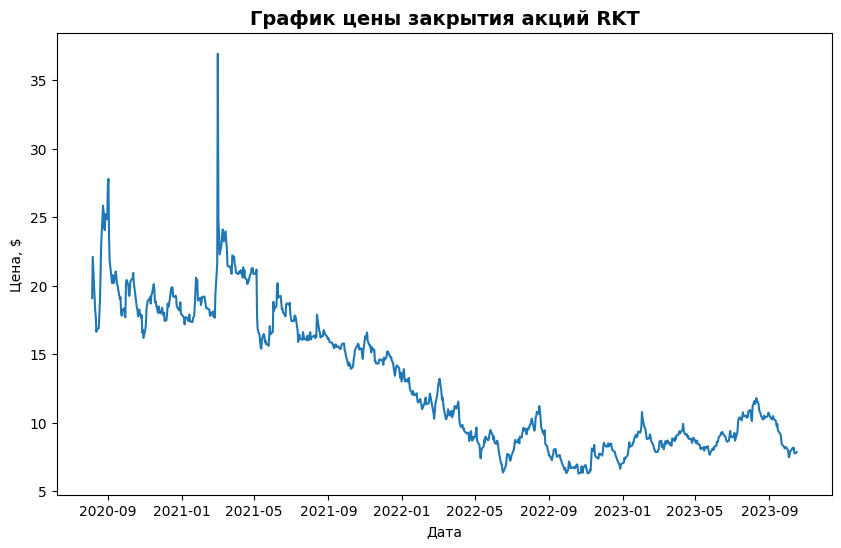

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(rkt_share['Adj Close'])
plt.title('График цены закрытия акций RKT', fontsize=14, fontweight='bold', color='black', loc='center')
plt.xlabel('Дата')
plt.ylabel('Цена, $')

In [ ]:
rolling_window=rkt_share['Adj Close'].rolling(window=3)

In [ ]:
rkt_share['Скользящее_среднее']=rolling_window.mean()
rkt_share['Скользящая_сумма']=rolling_window.sum()
rkt_share['Скользящая_дисперсия']=rolling_window.var()

In [ ]:
rkt_share

,Open,High,Low,Close,Adj Close,Volume,Скользящее_среднее,Скользящая_сумма,Скользящая_дисперсия
Date,,,,,,,,,
2020-08-06,18.00,22.760000,17.500000,21.51,19.098539,111631600,NaN,NaN,NaN
2020-08-07,24.75,26.850000,22.660000,24.90,22.108490,89903400,NaN,NaN,NaN
2020-08-10,24.24,24.750000,21.370001,21.67,19.240601,26126800,20.149210,60.447630,2.884129
2020-08-11,21.10,21.600000,20.040001,20.58,18.272799,18118200,19.873963,59.621889,3.978993
2020-08-12,20.65,21.190001,19.250000,20.00,17.757824,17365100,18.423741,55.271223,0.566744
...,...,...,...,...,...,...,...,...,...
2023-10-10,8.16,8.290000,8.080000,8.10,8.100000,2553500,8.056667,24.170001,0.010433
2023-10-11,8.16,8.380000,8.100000,8.19,8.190000,1986600,8.140000,24.420000,0.002100
2023-10-12,8.19,8.190000,7.800000,7.82,7.820000,3235300,8.036667,24.110000,0.037233


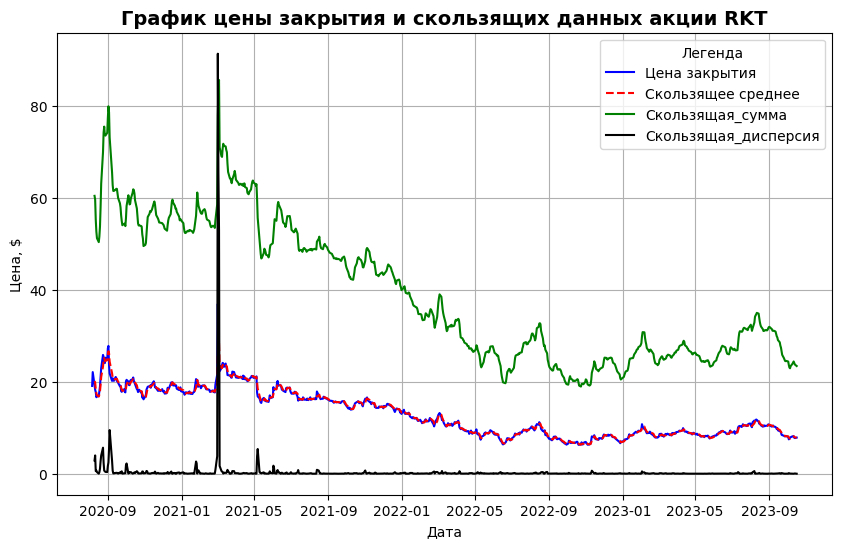

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(rkt_share['Adj Close'], color='blue')
plt.plot(rkt_share['Скользящее_среднее'], linestyle = '--', color='red')
plt.plot(rkt_share['Скользящая_сумма'], color='green')
plt.plot(rkt_share['Скользящая_дисперсия'], color='black')
plt.grid()
plt.title('График цены закрытия и скользящих данных акции RKT', fontsize=14, fontweight='bold', color='black', loc='center')
plt.xlabel('Дата')
plt.ylabel('Цена, $')
plt.legend(['Цена закрытия', 'Скользящее среднее', 'Скользящая_сумма', 'Скользящая_дисперсия'], title='Легенда', frameon=True)

In [ ]:
rkt_share.describe()

,Open,High,Low,Close,Adj Close,Volume,Скользящее_среднее,Скользящая_сумма,Скользящая_дисперсия
count,804.000000,804.000000,804.000000,804.000000,804.000000,8.040000e+02,802.000000,802.000000,802.000000
mean,13.899702,14.273609,13.551785,13.872164,13.038152,7.204108e+06,13.035847,39.107541,0.442693
std,5.913861,6.174169,5.676860,5.876530,4.971242,1.677478e+07,4.937681,14.813043,4.413998
min,6.260000,6.380000,5.970000,6.280000,6.280000,6.968000e+05,6.320000,18.960001,0.000029
25%,8.700000,8.865000,8.467500,8.667500,8.667500,2.563550e+06,8.666667,26.000000,0.016900
50%,11.610000,11.797000,11.292500,11.550000,11.338119,4.040650e+06,11.286008,33.858024,0.043317
75%,19.352500,19.710000,18.787500,19.230000,17.495896,7.134700e+06,17.525132,52.575397,0.114610
max,37.110001,43.000000,30.610001,41.599998,36.936272,3.765591e+08,28.551620,85.654860,91.363938


In [ ]:
rkt_share.loc[rkt_share['Adj Close'] > 36]

,Open,High,Low,Close,Adj Close,Volume,Скользящее_среднее,Скользящая_сумма,Скользящая_дисперсия
Date,,,,,,,,,
2021-03-02,27.34,43.0,26.950001,41.599998,36.936272,376559100,25.970816,77.912447,91.363938


Акции компании RKT с начала 2023 год анаходятся в консолидации с трендом к увеличению цены.
Максимальная цена закрытия достигала значения 36.936268 2021-03-02.После этого дня наблюдался спад цены.

## 6. Рассчитать индекс индустрии за последние 3 года на основе 10 крупнейших компаний. Сравнить динамику индекса и курса акций выбранной компании.

In [ ]:
# вывод компаний индустрии "Finance: Consumer Services", которые на рынке с 2020 года; вывод определенных столбцов, отсортированных в порядке убывания по знаечнию "Market Cap"
df[['Industry', 'IPO Year', 'Symbol', 'Market Cap']].loc[(df['Industry'] == 'Finance: Consumer Services') & (df['IPO Year'] >= 2020)].sort_values(by=['Market Cap'], ascending=False)

,Industry,IPO Year,Symbol,Market Cap
2513,Finance: Consumer Services,2020,LU,13726306404
2665,Finance: Consumer Services,2020,UPST,2913672894
2608,Finance: Consumer Services,2020,RKT,883119722
3181,Finance: Consumer Services,2021,HMPT,549098144
2797,Finance: Consumer Services,2021,AURC,341248525


In [ ]:
tickers_list=['LU', 'UPST', 'RKT', 'HMPT', 'AURC']
company_shares=pd.DataFrame(columns=tickers_list)
for ticker in tickers_list:
    company_shares[ticker] = yf.download(ticker, interval='1d')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HMPT']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


In [ ]:
company_shares

,LU,UPST,RKT,HMPT,AURC
Date,,,,,
2020-10-30,10.561314,NaN,16.186256,NaN,NaN
2020-11-02,11.342112,NaN,16.807779,NaN,NaN
2020-11-03,10.405154,NaN,17.207331,NaN,NaN
2020-11-04,10.421592,NaN,18.308317,NaN,NaN
2020-11-05,11.391424,NaN,18.601320,NaN,NaN
...,...,...,...,...,...
2023-10-10,1.091000,29.410000,8.100000,NaN,NaN
2023-10-11,1.080000,29.010000,8.190000,NaN,NaN
2023-10-12,1.070000,27.740000,7.820000,NaN,NaN


Text(0, 0.5, 'Цена, $')

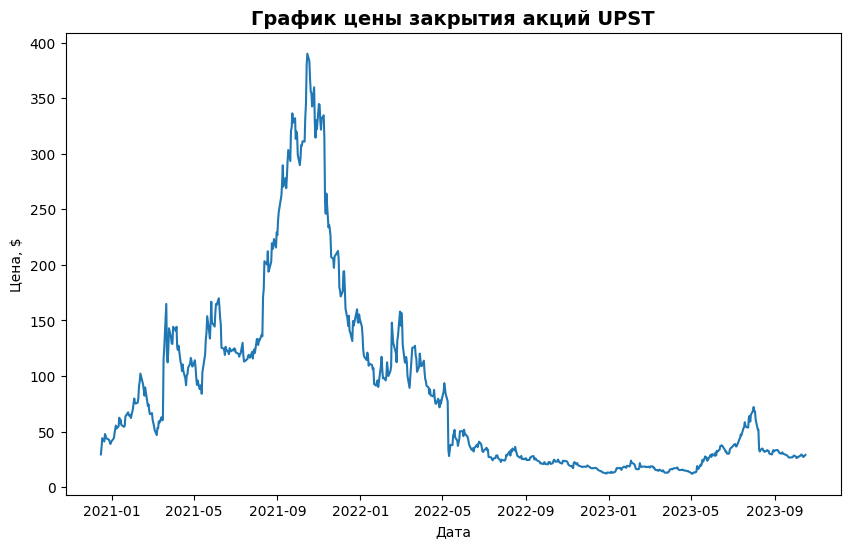

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(company_shares['UPST'])
plt.title('График цены закрытия акций UPST', fontsize=14, fontweight='bold', color='black', loc='center')
plt.xlabel('Дата')
plt.ylabel('Цена, $')

In [ ]:
company_shares.loc[company_shares['UPST'] > 0]

,LU,UPST,RKT,HMPT,AURC
Date,,,,,
2020-12-16,11.720182,29.469999,19.879883,NaN,NaN
2020-12-17,12.081813,35.770000,19.888762,NaN,NaN
2020-12-18,12.607825,44.090000,19.213964,NaN,NaN
2020-12-21,12.131128,41.099998,19.178450,NaN,NaN
2020-12-22,11.383206,47.840000,19.267239,NaN,NaN
...,...,...,...,...,...
2023-10-10,1.091000,29.410000,8.100000,NaN,NaN
2023-10-11,1.080000,29.010000,8.190000,NaN,NaN
2023-10-12,1.070000,27.740000,7.820000,NaN,NaN


In [ ]:
company_shares=company_shares[['LU', 'UPST', 'RKT']].loc[company_shares['UPST'] > 0]

In [ ]:
company_shares

,LU,UPST,RKT
Date,,,
2020-12-16,11.720182,29.469999,19.879883
2020-12-17,12.081813,35.770000,19.888762
2020-12-18,12.607825,44.090000,19.213964
2020-12-21,12.131128,41.099998,19.178450
2020-12-22,11.383206,47.840000,19.267239
...,...,...,...
2023-10-10,1.091000,29.410000,8.100000
2023-10-11,1.080000,29.010000,8.190000
2023-10-12,1.070000,27.740000,7.820000


In [ ]:
company_shares_2=company_shares[['LU', 'UPST', 'RKT']]
company_shares_2['index']=' '

In [ ]:
company_shares

,LU,UPST,RKT
Date,,,
2020-12-16,11.720182,29.469999,19.879883
2020-12-17,12.081813,35.770000,19.888762
2020-12-18,12.607825,44.090000,19.213964
2020-12-21,12.131128,41.099998,19.178450
2020-12-22,11.383206,47.840000,19.267239
...,...,...,...
2023-10-10,1.091000,29.410000,8.100000
2023-10-11,1.080000,29.010000,8.190000
2023-10-12,1.070000,27.740000,7.820000


In [ ]:
daily_avg_prices = []
for day in range(712):
  daily_prices=[company_shares[company][day] for company in company_shares]
  avg_price=sum(daily_prices) / len(daily_prices)
  daily_avg_prices.append(avg_price)
base_index = 100
daily_index = [base_index]

for i in range(1, len(daily_avg_prices)):
  index_change = (daily_avg_prices[i] - daily_avg_prices[i - 1]) / daily_avg_prices[i - 1] * 100
  daily_index.append(daily_index[-1] + index_change)
  company_shares_2['index'][i]=round(daily_index[i], 2)

# Вывод результатов
# for day, index_value in enumerate(daily_index):
  # print(f"День {day + 1}: Индекс = {index_value:.2f}")

<ipython-input-609-b2de608976e1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_shares_2['index'][i]=round(daily_index[i], 2)


In [ ]:
company_shares_2['index'][0]=round(base_index, 2)
company_shares_2

<ipython-input-610-b2b4685af18b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_shares_2['index'][0]=round(base_index, 2)


,LU,UPST,RKT,index
Date,,,,
2020-12-16,11.720182,29.469999,19.879883,100
2020-12-17,12.081813,35.770000,19.888762,110.92
2020-12-18,12.607825,44.090000,19.213964,122.99
2020-12-21,12.131128,41.099998,19.178450,118.37
2020-12-22,11.383206,47.840000,19.267239,126.77
...,...,...,...,...
2023-10-10,1.091000,29.410000,8.100000,206.85
2023-10-11,1.080000,29.010000,8.190000,206.02
2023-10-12,1.070000,27.740000,7.820000,201.71


Text(0, 0.5, 'Цена, $')

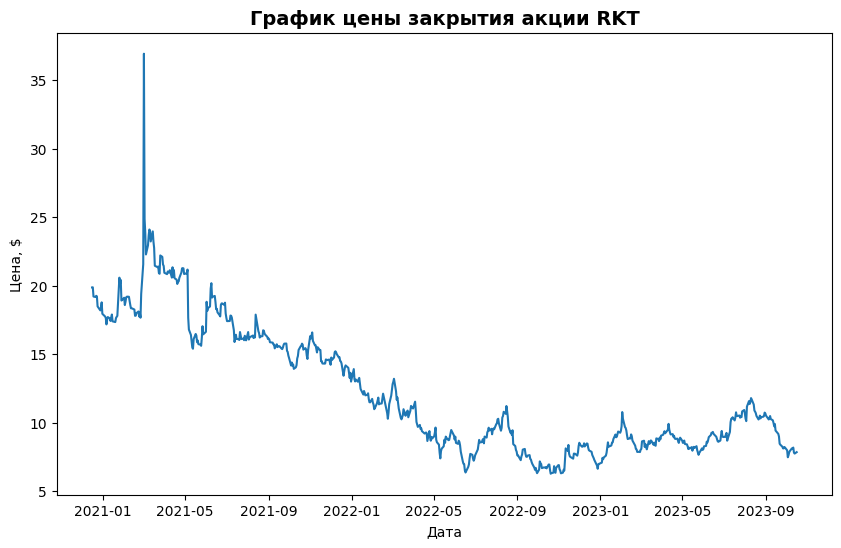

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(company_shares['RKT'])
plt.title('График цены закрытия акции RKT', fontsize=14, fontweight='bold', color='black', loc='center')
plt.xlabel('Дата')
plt.ylabel('Цена, $')

Text(0, 0.5, 'Цена, $')

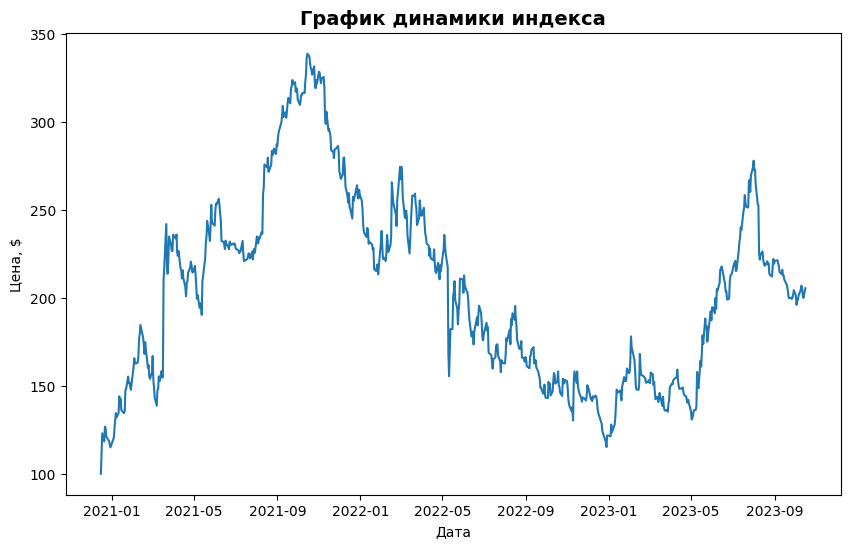

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(company_shares_2['index'])
plt.title('График динамики индекса', fontsize=14, fontweight='bold', color='black', loc='center')
plt.xlabel('Дата')
plt.ylabel('Цена, $')

Динамика акций компании RKT относительно схож с динамикой индекса компаний индустрии "Finance: Consumer Services", при этом можно заметить после мая 2023 года индекса набирает обороты и резко возрастает, а с акиями компании такое движение не наблюдается

## 7. Сравнить динамику показателей мировой экономики (ВВП, население, инфляция и т.д., не менее пяти) и динамику индекса.

In [ ]:
gold_prices=pd.read_csv("monthly_csv.csv")

In [ ]:
gold_prices

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [ ]:
gold_prices_2020=gold_prices.loc[gold_prices['Date'] > "2019-12"]

In [ ]:
gold_prices_2020

,Date,Price
840,2020-01,1560.668
841,2020-02,1598.818
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032
846,2020-07,1840.807


Text(0, 0.5, 'Цена, $')

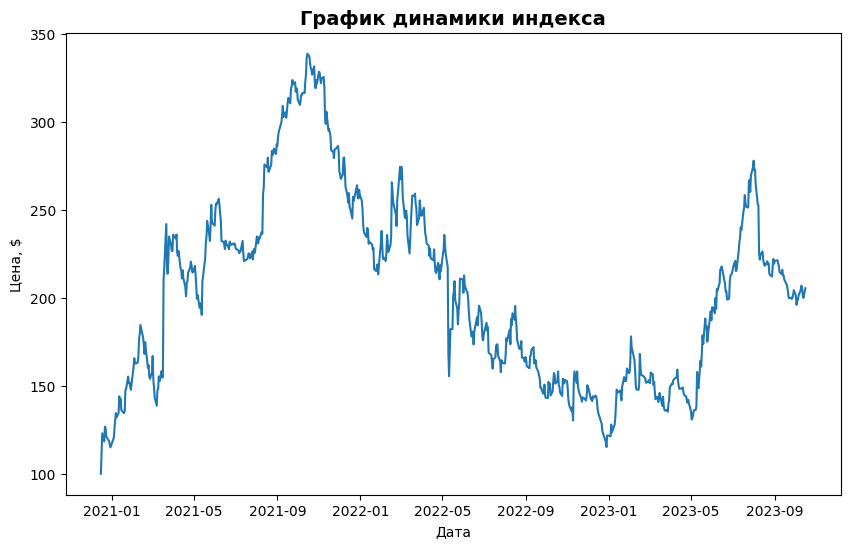

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(company_shares_2['index'])
plt.title('График динамики индекса', fontsize=14, fontweight='bold', color='black', loc='center')
plt.xlabel('Дата')
plt.ylabel('Цена, $')

Text(0, 0.5, 'Цена, $')

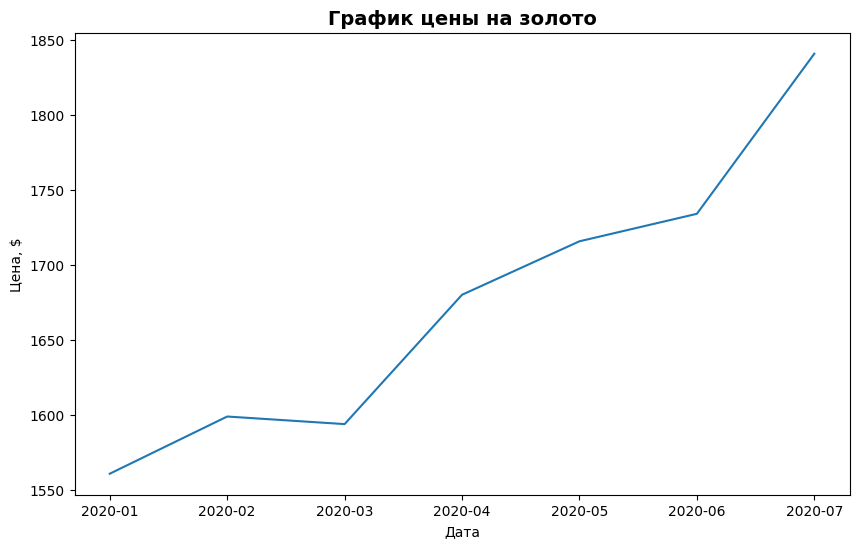

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(gold_prices_2020['Date'], gold_prices_2020['Price'])
plt.title('График цены на золото', fontsize=14, fontweight='bold', color='black', loc='center')
plt.xlabel('Дата')
plt.ylabel('Цена, $')

In [ ]:
gas_prices=pd.read_csv("monthly_csv (1).csv")

In [ ]:
gas_prices

,Month,Price
0,1997-01,3.45
1,1997-02,2.15
2,1997-03,1.89
3,1997-04,2.03
4,1997-05,2.25
...,...,...
279,2020-04,1.74
280,2020-05,1.75
281,2020-06,1.63
282,2020-07,1.77


In [ ]:
gas_prices_2020=gas_prices.loc[gas_prices['Month'] > "2019-12"]

In [ ]:
gas_prices_2020

,Month,Price
276,2020-01,2.02
277,2020-02,1.91
278,2020-03,1.79
279,2020-04,1.74
280,2020-05,1.75
281,2020-06,1.63
282,2020-07,1.77
283,2020-08,2.30


Text(0, 0.5, 'Цена, $')

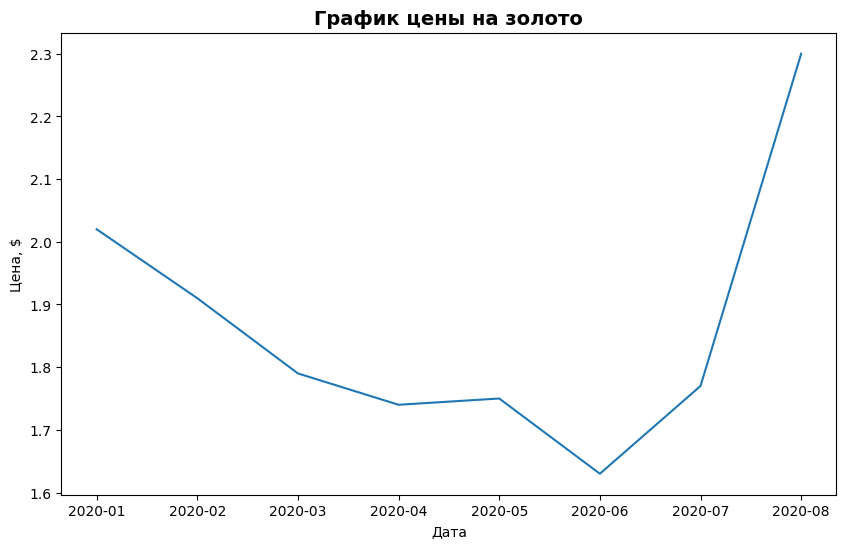

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(gas_prices_2020['Month'], gas_prices_2020['Price'])
plt.title('График цены на золото', fontsize=14, fontweight='bold', color='black', loc='center')
plt.xlabel('Дата')
plt.ylabel('Цена, $')

## 8. Сравнить курс акций компании и динамику показателей национальной экономики

In [ ]:
# United States

In [ ]:
WLD=pd.read_xml("WLD_2020_FBS_v01_M.xml")

In [ ]:
WLD

,citation,stdyInfo,method,dataAccs,notes
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN


In [ ]:
global_findex=pd.read_xml("USA_2021_FINDEX_v02_M.xml")

In [ ]:
global_findex

,citation,stdyInfo,method,dataAccs,ID,fileTxt,var
0,NaN,NaN,NaN,NaN,None,NaN,NaN
1,NaN,NaN,NaN,NaN,None,NaN,NaN
2,NaN,NaN,NaN,NaN,F1,NaN,NaN
3,NaN,NaN,NaN,NaN,None,NaN,NaN


## 9. Сделать предсказание курса акций с помощью модели ARIMA, на следующие две недели. Подобрать наилучшие параметры модели.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(rkt_share['Adj Close'])

(-1.6398292369571144,
 0.46235002288720356,
 4,
 799,
 {'1%': -3.4385608049885876,
  '5%': -2.865164107438179,
  '10%': -2.5686998068142124},
 1849.2667752671332)

Вывод: временной ряд нестационарен.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
model = ARIMA(rkt_share['Adj Close'], order=(3, 1, 1))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


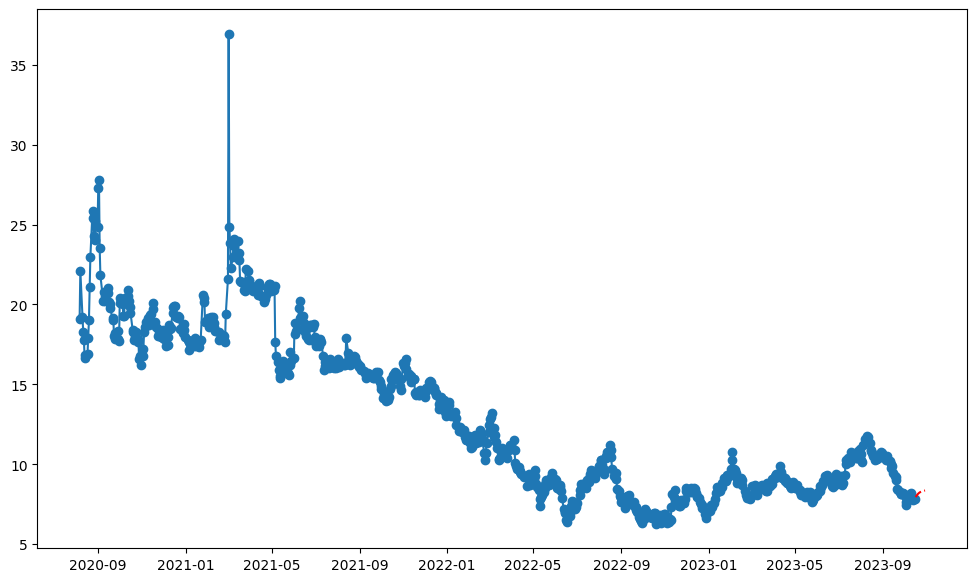

In [ ]:
forecasted_values = results.forecast(steps=14, alpha=0.05)
plt.figure(figsize=(12, 7))
plt.plot(rkt_share['Adj Close'], marker='o')
plt.plot(pd.date_range(start=rkt_share.index[-1], periods=14+1,freq='D')[1:], forecasted_values, linestyle='--', color='red')

In [ ]:
acf(rkt_share['Adj Close'], nlags=5)
pacf(rkt_share['Adj Close'], nlags=5)

array([1.        , 0.98461401, 0.15386483, 0.04471892, 0.13490887,
       0.05516611])

## 10. Загрузить в блокнот изображение логотипа компании. Выполнить с изображением 3-4 операции, используя любые функции из библиотеки OpenCV (кроме изменения контраста и яркости).

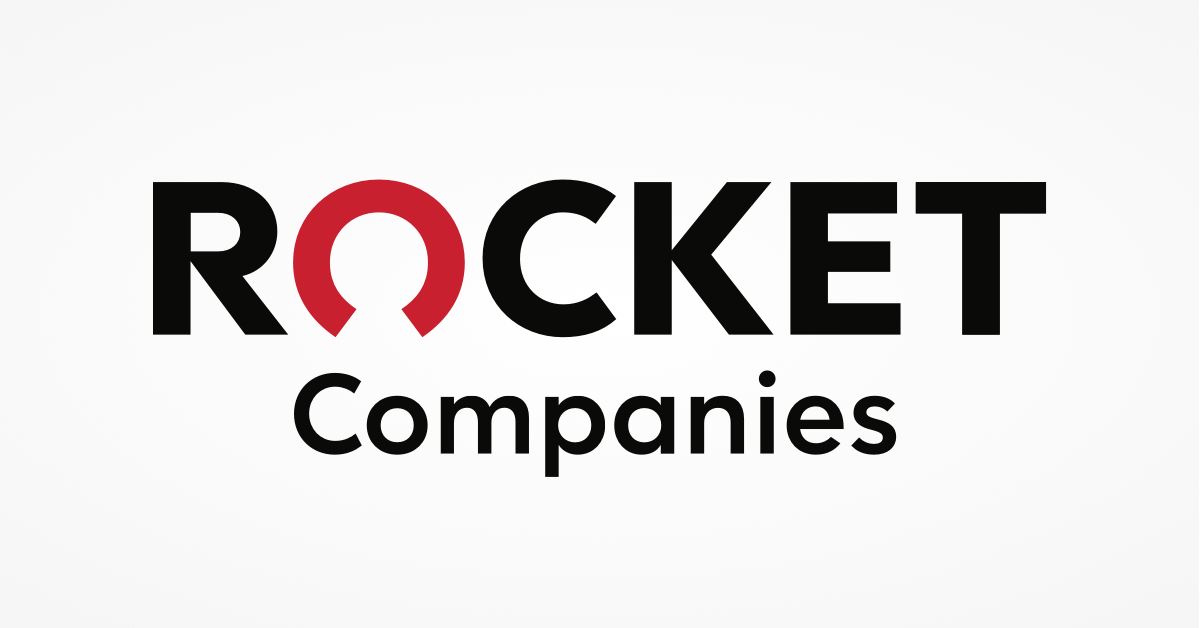

In [ ]:
import cv2
from urllib.request import urlopen
import numpy as np
from google.colab.patches import cv2_imshow
response = urlopen("https://www.rocketcompanies.com/wp-content/uploads/2020/07/rkt-meta-og.jpg")
image_array = np.asarray(bytearray(response.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
cv2_imshow(image)

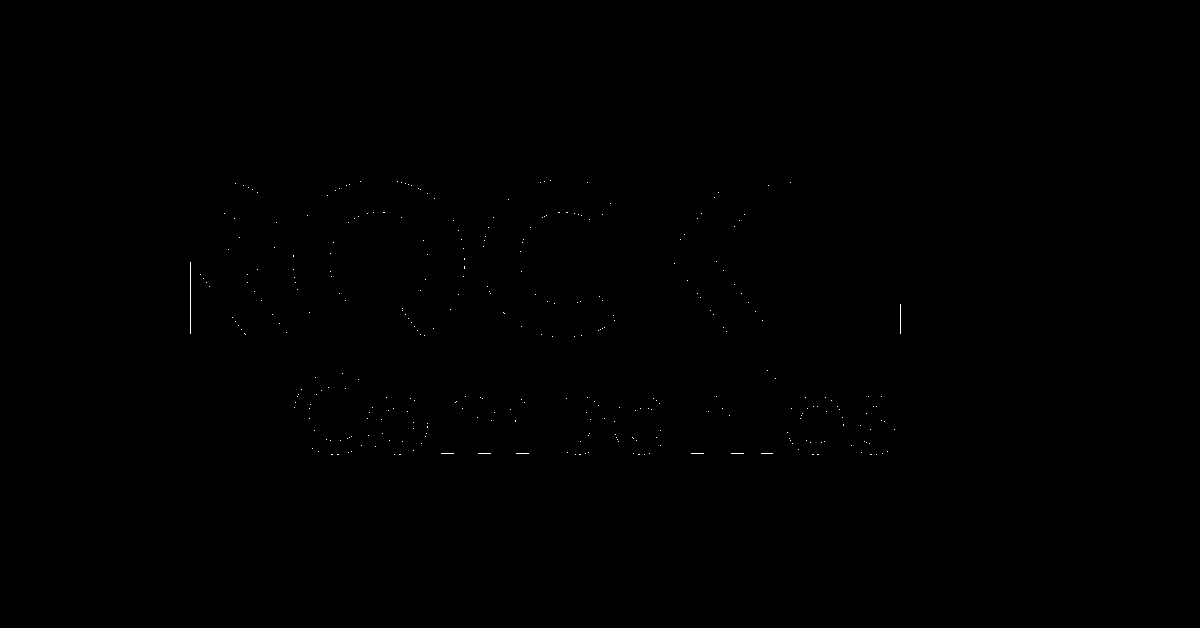

In [ ]:
# Изменение цветовых пространств

lower_blue=np.array([110,50,50])
upper_blue=np.array([130,255,255])
mask = cv2.inRange(image, lower_blue, upper_blue)
cv2_imshow(mask)

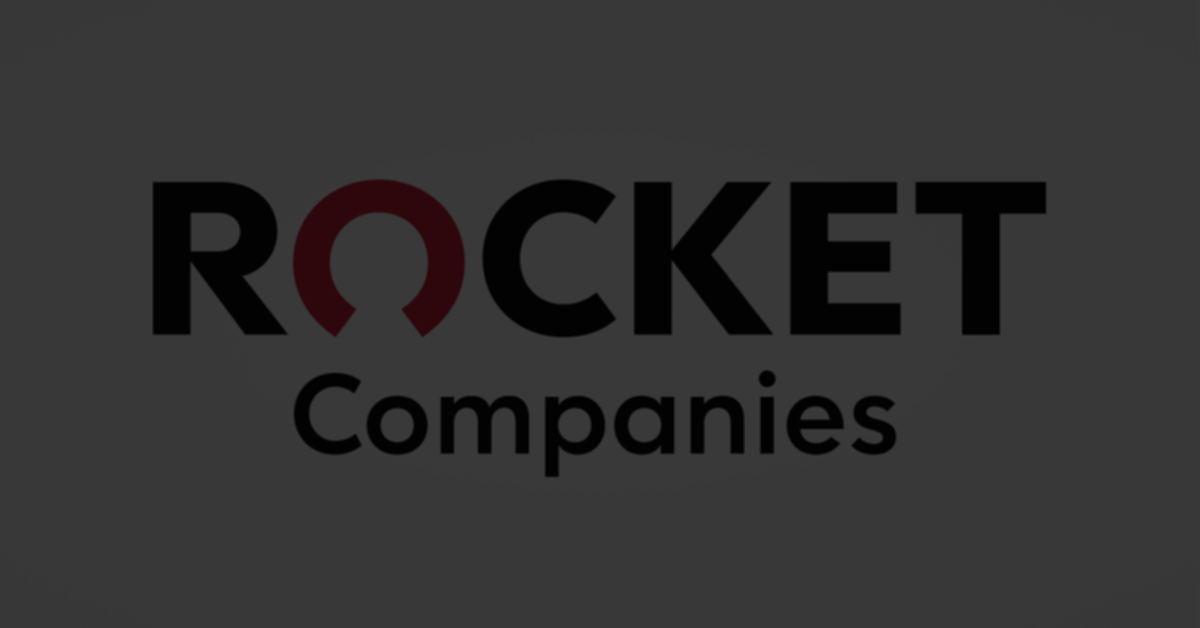

In [ ]:
# Сглаживание изображений

kernel=np.ones((3,3),np.float32)/40
dst=cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

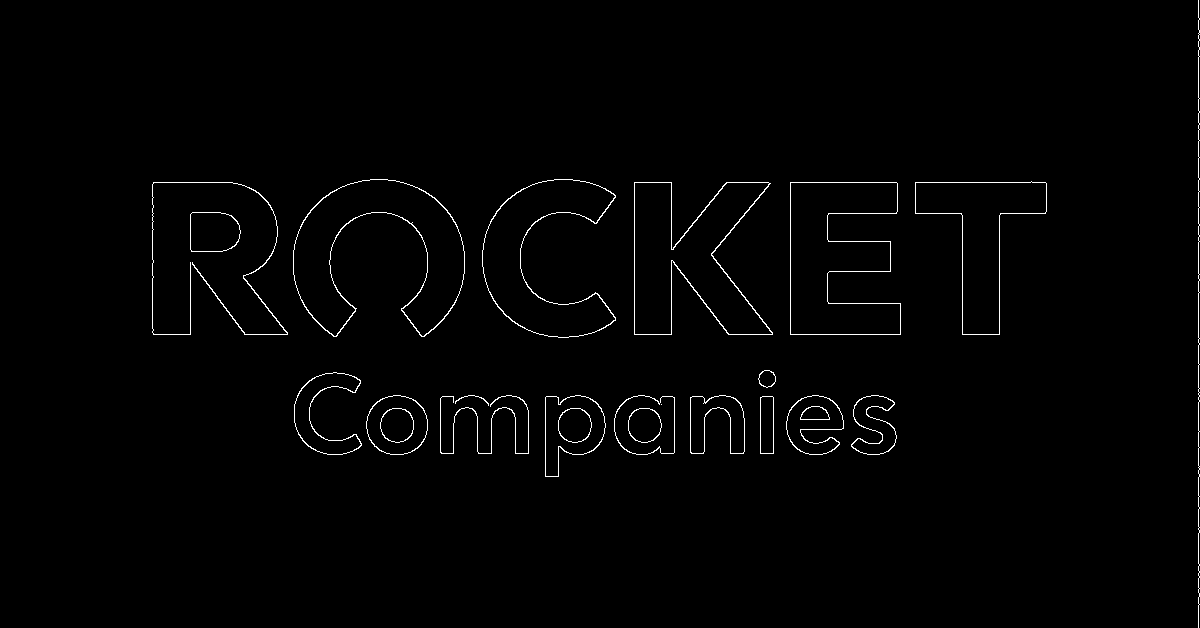

In [ ]:
edges=cv2.Canny(image,10,20)
cv2_imshow(edges)

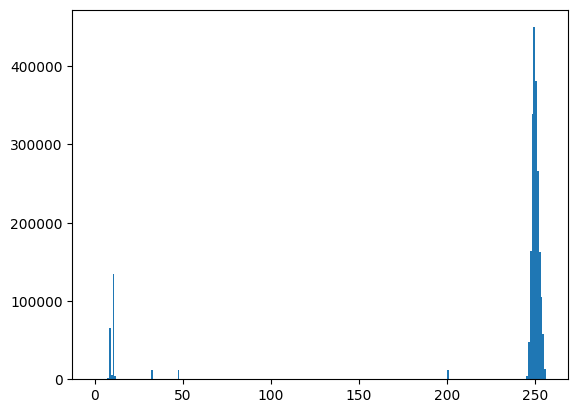

In [ ]:
plt.hist(image.ravel(),256,[0,256])
plt.show()